In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
from docplex.mp.model import Model
# from NPG_CMDP import CMDP_NPG
# from ARNPG_CMDP import CMDP_ARNPG
# from MARL import MARL_agent, MO_MARL

# Random Seed
np.random.seed(10)

In [2]:
# n = 3
# a = 5
n=3
action_spaces = np.array([3,4,5])
# action_spaces = np.array([3,3])


# shape = [a for x in range(n)]
reward = np.random.uniform(0, 1, size=(action_spaces))
# reward = np.zeros(action_spaces)
# reward = np.array([[1,1],[0,1]])
# rewards = [reward]
# reward[0,1] = reward[1,2] = reward[2,0] = 1
# reward[1,0] = reward[2,1] = reward[0,2] = -1

print(reward)
# Start state distribution
# rho = np.ones(s) / s

# initial_pi = np.ones((n,a))/a
# initial_pi = ([np.array([1/i for x in range(int(i))]) for i in (action_spaces)])
initial_pi = ([np.random.uniform(0,1,size=int(i)) for i in (action_spaces)])
for pi in initial_pi:
    pi/=np.sum(pi)
print(initial_pi)

[[[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701]
  [0.22479665 0.19806286 0.76053071 0.16911084 0.08833981]
  [0.68535982 0.95339335 0.00394827 0.51219226 0.81262096]
  [0.61252607 0.72175532 0.29187607 0.91777412 0.71457578]]

 [[0.54254437 0.14217005 0.37334076 0.67413362 0.44183317]
  [0.43401399 0.61776698 0.51313824 0.65039718 0.60103895]
  [0.8052232  0.52164715 0.90864888 0.31923609 0.09045935]
  [0.30070006 0.11398436 0.82868133 0.04689632 0.62628715]]

 [[0.54758616 0.819287   0.19894754 0.8568503  0.35165264]
  [0.75464769 0.29596171 0.88393648 0.32551164 0.1650159 ]
  [0.39252924 0.09346037 0.82110566 0.15115202 0.38411445]
  [0.94426071 0.98762547 0.45630455 0.82612284 0.25137413]]]
[array([0.29358315, 0.443704  , 0.26271285]), array([0.55351548, 0.03684008, 0.33497996, 0.07466448]), array([0.16252528, 0.17596499, 0.41172992, 0.02126099, 0.22851881])]


In [3]:
# eta = 0.1
# tau = 0
# pi_star = np.copy(initial_pi)
# new_pi_star = np.copy(initial_pi)

# print(pi_star[0])
# pi = np.copy(initial_pi)
# NE_gaps = []
# N = 2000
# for i in tqdm(range(N)):
#     NE_gap = []
#     next_pi = np.copy(pi)
#     for agent in range(n):
# #         r = np.zeros(a)
#         r = np.copy(reward)
#         r = np.transpose(r)
#         for left_agent in range(agent):
#             r = np.matmul((r), pi[left_agent])
#         r = np.transpose(r)
#         for right_agent in range(n-1,agent, -1):
#             r = np.matmul(r, pi[right_agent])
#         NE_gap.append(np.max(r)-np.dot(r,pi[agent]))
        
#         next_pi[agent] = np.power(pi[agent],(1-eta*tau))*np.exp(eta*r)
#         next_pi[agent]/=np.sum(next_pi[agent])
    
#     NE_gaps.append(NE_gap)
#     pi = np.copy(next_pi)

# NE_gaps = np.array(NE_gaps)
# NPG_NE_gaps = np.sum(NE_gaps, axis=1)
# plt.plot(NPG_NE_gaps)
# plt.ylim(0,0.1)

[0.29358315 0.443704   0.26271285]


100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 9810.65it/s]


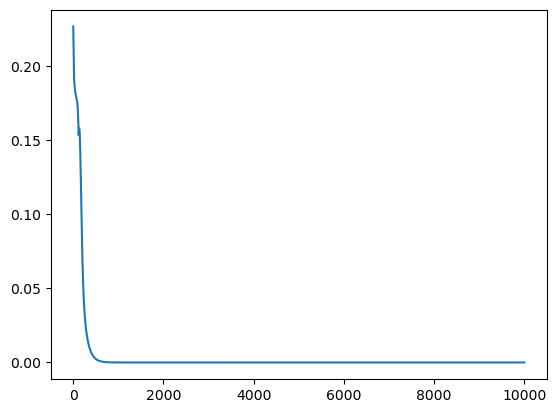

In [15]:
eta = 0.1
tau = 0
pi_star = np.copy(initial_pi)
new_pi_star = np.copy(initial_pi)

print(pi_star[0])
pi = np.copy(initial_pi)
theta = np.copy(initial_pi)
for agent in range(n):
    theta[agent] = np.log(theta[agent])

NE_gaps = []
N = 10000
for i in tqdm(range(N)):
    NE_gap = []
    next_pi = np.copy(pi)
    next_theta = np.copy(theta)
    for agent in range(n):
#         r = np.zeros(a)
        r = np.copy(reward)
        r = np.transpose(r)
        for left_agent in range(agent):
            r = np.matmul((r), pi[left_agent])
        r = np.transpose(r)
        for right_agent in range(n-1,agent, -1):
            r = np.matmul(r, pi[right_agent])
        r = r-np.dot(r,pi[agent])
        NE_gap.append(np.max(r))
        
        next_theta[agent] += eta*r   # this is for NPG
        # next_theta[agent] += eta*r*pi[agent]
        next_pi[agent] = np.exp(next_theta[agent])

        
        # next_pi[agent] = np.power(pi[agent],(1-eta*tau))*np.exp(eta*r)
        
        next_pi[agent]/=np.sum(next_pi[agent])
    NE_gaps.append(NE_gap)
    pi = np.copy(next_pi)
    theta = np.copy(next_theta)

NE_gaps = np.array(NE_gaps)
NPG_NE_gaps = np.sum(NE_gaps, axis=1)
# NPG_NE_gaps = NE_gaps
plt.plot(NPG_NE_gaps)
# plt.ylim(0,0.01)

[0.29358315 0.443704   0.26271285]


100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 9188.42it/s]


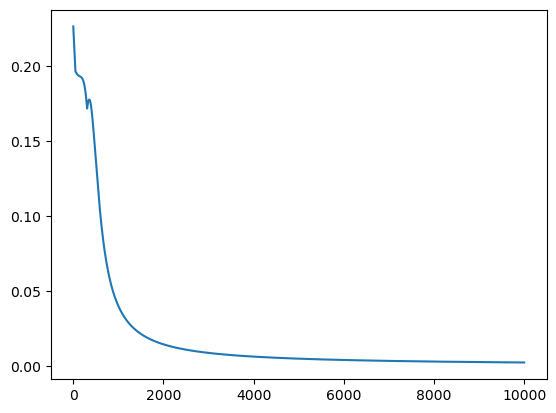

In [16]:
eta = 0.1
tau = 0
pi_star = np.copy(initial_pi)
new_pi_star = np.copy(initial_pi)

print(pi_star[0])
pi = np.copy(initial_pi)
theta = np.copy(initial_pi)
for agent in range(n):
    theta[agent] = np.log(theta[agent])

NE_gaps = []
# N = 20000
for i in tqdm(range(N)):
    NE_gap = []
    next_pi = np.copy(pi)
    next_theta = np.copy(theta)
    for agent in range(n):
#         r = np.zeros(a)
        r = np.copy(reward)
        r = np.transpose(r)
        for left_agent in range(agent):
            r = np.matmul((r), pi[left_agent])
        r = np.transpose(r)
        for right_agent in range(n-1,agent, -1):
            r = np.matmul(r, pi[right_agent])
        r = r-np.dot(r,pi[agent])
        NE_gap.append(np.max(r))
        
        # next_theta[agent] += eta*r   # this is for NPG
        next_theta[agent] += eta*r*pi[agent]
        next_pi[agent] = np.exp(next_theta[agent])

        
        # next_pi[agent] = np.power(pi[agent],(1-eta*tau))*np.exp(eta*r)
        
        next_pi[agent]/=np.sum(next_pi[agent])
    NE_gaps.append(NE_gap)
    pi = np.copy(next_pi)
    theta = np.copy(next_theta)

NE_gaps = np.array(NE_gaps)
PG_NE_gaps = np.sum(NE_gaps, axis=1)
plt.plot(PG_NE_gaps)


[0.29358315 0.443704   0.26271285]


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 8373.84it/s]


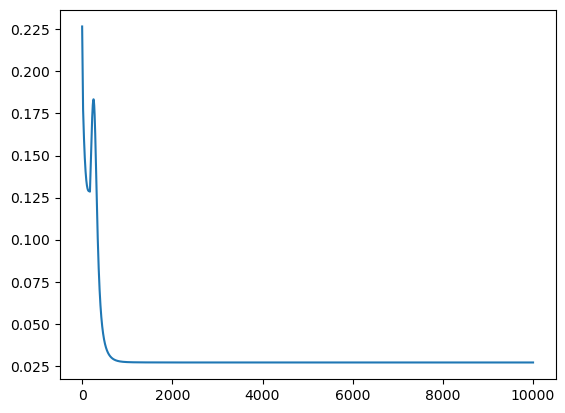

In [6]:
eta = 0.1
tau = 0.05
pi_star = np.copy(initial_pi)
new_pi_star = np.copy(initial_pi)

print(pi_star[0])
pi = np.copy(initial_pi)
theta = np.copy(initial_pi)
for agent in range(n):
    theta[agent] = np.log(theta[agent])

NE_gaps = []
# N = 2000
for i in tqdm(range(N)):
    NE_gap = []
    next_pi = np.copy(pi)
    next_theta = np.copy(theta)
    for agent in range(n):
#         r = np.zeros(a)
        r = np.copy(reward)
        r = np.transpose(r)
        for left_agent in range(agent):
            r = np.matmul((r), pi[left_agent])
        r = np.transpose(r)
        for right_agent in range(n-1,agent, -1):
            r = np.matmul(r, pi[right_agent])
        r = r-np.dot(r,pi[agent])
        NE_gap.append(np.max(r))
        
        # # next_theta[agent] += eta*r   # this is for NPG
        # next_theta[agent] += eta*r*pi[agent]
        # next_pi[agent] = np.exp(next_theta[agent])

        
        next_pi[agent] = np.power(pi[agent],(1-eta*tau))*np.exp(eta*r)  #NPG+regularization
        
        next_pi[agent]/=np.sum(next_pi[agent])
    NE_gaps.append(NE_gap)
    pi = np.copy(next_pi)
    theta = np.copy(next_theta)

NE_gaps = np.array(NE_gaps)
NPG_regularization_NE_gaps = np.sum(NE_gaps, axis=1)
plt.plot(NPG_regularization_NE_gaps)
# plt.plot(PG_NE_gaps)


[0.29358315 0.443704   0.26271285]


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6591.85it/s]


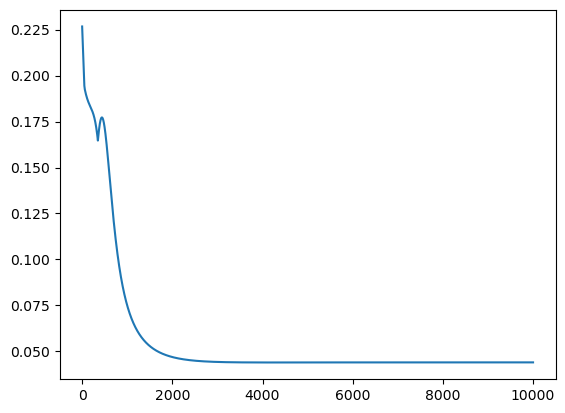

In [7]:
eta = 0.1
tau = 0.005
pi_star = np.copy(initial_pi)
new_pi_star = np.copy(initial_pi)

print(pi_star[0])
pi = np.copy(initial_pi)
theta = np.copy(initial_pi)
for agent in range(n):
    theta[agent] = np.log(theta[agent])

NE_gaps = []
# N = 2000
for i in tqdm(range(N)):
    NE_gap = []
    next_pi = np.copy(pi)
    next_theta = np.copy(theta)
    for agent in range(n):
#         r = np.zeros(a)
        r = np.copy(reward)
        r = np.transpose(r)
        for left_agent in range(agent):
            r = np.matmul((r), pi[left_agent])
        r = np.transpose(r)
        for right_agent in range(n-1,agent, -1):
            r = np.matmul(r, pi[right_agent])
        r = r-np.dot(r,pi[agent])
        NE_gap.append(np.max(r))
        
        # next_theta[agent] += eta*r   # this is for NPG
        next_theta[agent] += eta*(r*pi[agent] + tau*(1-pi[agent]*action_spaces[agent]))
        next_pi[agent] = np.exp(next_theta[agent])

        
        # next_pi[agent] = np.power(pi[agent],(1-eta*tau))*np.exp(eta*r)
        
        next_pi[agent]/=np.sum(next_pi[agent])
    NE_gaps.append(NE_gap)
    pi = np.copy(next_pi)
    theta = np.copy(next_theta)

NE_gaps = np.array(NE_gaps)
PG_log_barrier_NE_gaps = np.sum(NE_gaps, axis=1)
plt.plot(PG_log_barrier_NE_gaps)


[0.29358315 0.443704   0.26271285]


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 7293.97it/s]


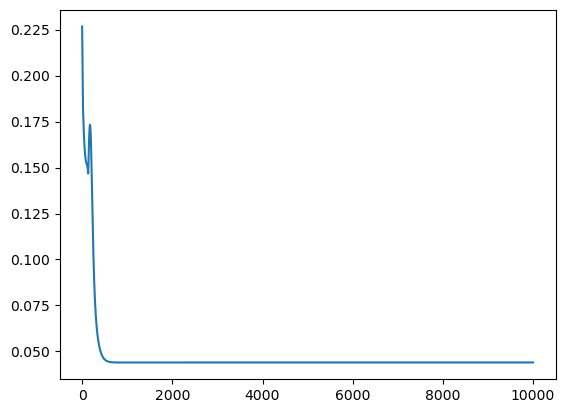

In [8]:
eta = 0.1
tau = 0.005
pi_star = np.copy(initial_pi)
new_pi_star = np.copy(initial_pi)

print(pi_star[0])
pi = np.copy(initial_pi)
theta = np.copy(initial_pi)
for agent in range(n):
    theta[agent] = np.log(theta[agent])

NE_gaps = []
# N = 2000
for i in tqdm(range(N)):
    NE_gap = []
    next_pi = np.copy(pi)
    next_theta = np.copy(theta)
    for agent in range(n):
#         r = np.zeros(a)
        r = np.copy(reward)
        r = np.transpose(r)
        for left_agent in range(agent):
            r = np.matmul((r), pi[left_agent])
        r = np.transpose(r)
        for right_agent in range(n-1,agent, -1):
            r = np.matmul(r, pi[right_agent])
        r = r-np.dot(r,pi[agent])
        NE_gap.append(np.max(r))
        
        # next_theta[agent] += eta*r   # this is for NPG
        # next_theta[agent] += eta*r*pi[agent]
        # next_pi[agent] = np.exp(next_theta[agent])

        
        next_pi[agent] = pi[agent]*np.exp(eta*(r + tau/pi[agent] - tau*action_spaces[agent]) )
        
        next_pi[agent]/=np.sum(next_pi[agent])
    NE_gaps.append(NE_gap)
    pi = np.copy(next_pi)
    theta = np.copy(next_theta)

NE_gaps = np.array(NE_gaps)
NPG_log_barrier_NE_gaps = np.sum(NE_gaps, axis=1)
plt.plot(NPG_log_barrier_NE_gaps)
plt.show()

In [5]:
def projection_simplex_sort(v, z=1):
	# Courtesy: EdwardRaff/projection_simplex.py
    if v.sum() == z and np.alltrue(v >= 0):
        return v
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w

[0.29358315 0.443704   0.26271285]


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5567.23it/s]

[0.27537076 0.51465452 0.20997472]


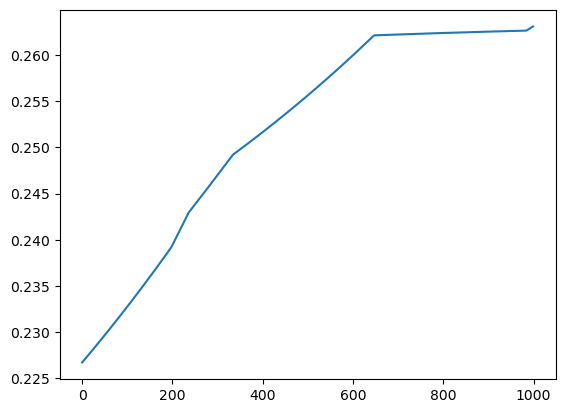

In [25]:
eta = 0.001
tau = 0
pi_star = np.copy(initial_pi)
new_pi_star = np.copy(initial_pi)

print(pi_star[0])
pi = np.copy(initial_pi)
theta = np.copy(initial_pi)
for agent in range(n):
    theta[agent] = np.log(theta[agent])

NE_gaps = []
N = 1000
for i in tqdm(range(N)):
    NE_gap = []
    next_pi = np.copy(pi)
    next_theta = np.copy(theta)
    for agent in range(n):
#         r = np.zeros(a)
        r = np.copy(reward)
        r = np.transpose(r)
        for left_agent in range(agent):
            r = np.matmul((r), pi[left_agent])
        r = np.transpose(r)
        for right_agent in range(n-1,agent, -1):
            r = np.matmul(r, pi[right_agent])
        # r = r-np.dot(r,pi[agent])
        ne = r-np.dot(r,pi[agent])
        NE_gap.append(np.max(ne))
        
        # next_theta[agent] += eta*r   # this is for NPG
        # next_theta[agent] += eta*r*pi[agent]
        
        next_pi[agent] = projection_simplex_sort(pi[agent]+pi[agent]*eta*r)

        # next_pi[agent] = np.power(pi[agent],(1-eta*tau))*np.exp(eta*r)
        next_pi[agent]/=np.sum(next_pi[agent])
    NE_gaps.append(NE_gap)
    pi = np.copy(next_pi)
    # theta = np.copy(next_theta)

NE_gaps = np.array(NE_gaps)
PGA_NE_gaps = np.sum(NE_gaps, axis=1)
plt.plot(PGA_NE_gaps)
print(pi[0])


[0.29358315 0.443704   0.26271285]


100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6016.70it/s]


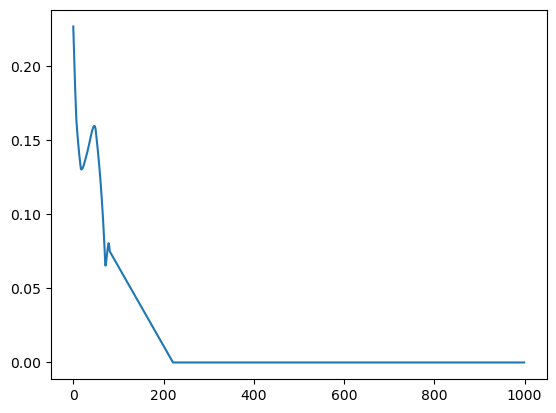

In [24]:
eta = 0.1
tau = 0
pi_star = np.copy(initial_pi)
new_pi_star = np.copy(initial_pi)

print(pi_star[0])
pi = np.copy(initial_pi)
theta = np.copy(initial_pi)
for agent in range(n):
    theta[agent] = np.log(theta[agent])

NE_gaps = []
N = 1000
for i in tqdm(range(N)):
    NE_gap = []
    next_pi = np.copy(pi)
    next_theta = np.copy(theta)
    for agent in range(n):
#         r = np.zeros(a)
        r = np.copy(reward)
        r = np.transpose(r)
        for left_agent in range(agent):
            r = np.matmul((r), pi[left_agent])
        r = np.transpose(r)
        for right_agent in range(n-1,agent, -1):
            r = np.matmul(r, pi[right_agent])
        # r = r-np.dot(r,pi[agent])
        ne = r-np.dot(r,pi[agent])
        NE_gap.append(np.max(ne))
        
        # next_theta[agent] += eta*r   # this is for NPG
        # next_theta[agent] += eta*r*pi[agent]
        
        next_pi[agent] = projection_simplex_sort(pi[agent]+eta*r)

        
        # next_pi[agent] = np.power(pi[agent],(1-eta*tau))*np.exp(eta*r)
        
        next_pi[agent]/=np.sum(next_pi[agent])
    NE_gaps.append(NE_gap)
    pi = np.copy(next_pi)
    # theta = np.copy(next_theta)

NE_gaps = np.array(NE_gaps)
PQA_NE_gaps = np.sum(NE_gaps, axis=1)
plt.plot(PQA_NE_gaps)
# plt.plot(PGA_NE_gaps)


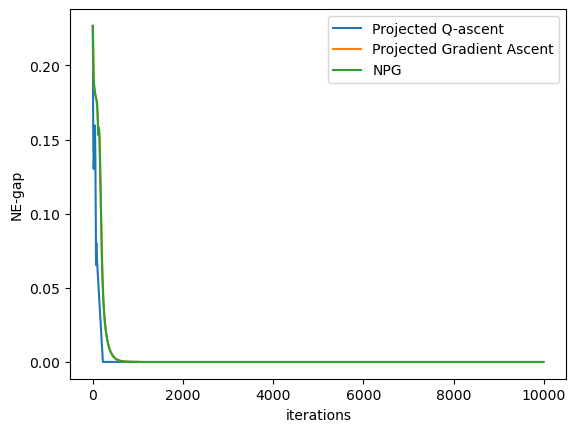

In [21]:
# plt.clear()
# plt.plot(NPG_log_barrier_NE_gaps, label="NPG log barrier")
# plt.plot(PG_log_barrier_NE_gaps, label="PG log barrier")
# plt.plot(PG_NE_gaps, label="PG")
# plt.plot(NPG_regularization_NE_gaps, label="NPG with regularization")
plt.plot(PQA_NE_gaps, label="Projected Q-ascent")
plt.plot(PGA_NE_gaps, label="Projected Gradient Ascent")
# plt.plot(NE_gaps)

plt.plot(NPG_NE_gaps, label="NPG")

plt.xlabel("iterations")
plt.ylabel("NE-gap")

plt.legend()
# plt.savefig("synthetic_comarison.pdf")

[array([1.00000000e+00, 1.50940226e-15, 1.89399207e-26])
 array([2.05758457e-25, 3.93313344e-28, 4.69678826e-13, 1.00000000e+00])
 array([5.19521886e-02, 2.86701805e-17, 4.58010037e-18, 1.67672131e-38,
        9.48047811e-01])                                               ]


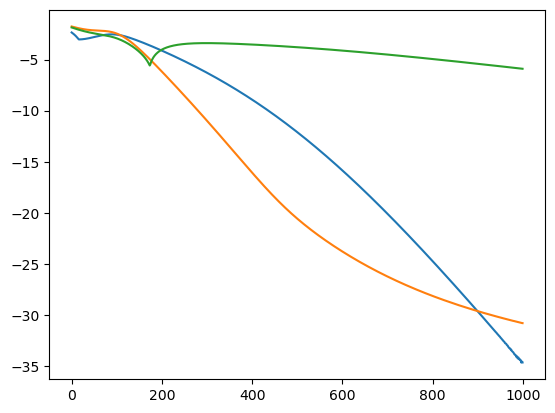

In [24]:
NE_gaps = np.array(NE_gaps)
print(pi)
# NE_sum = np.zeros(NE_gaps.shape)
# for i in range(1,N):
#     NE_sum[i,:] = NE_sum[i-1,:]+NE_gaps[i,:]

# plt.plot(np.max(NE_gaps, axis=1))
# plt.plot(NE_sum)
# plt.plot(np.sum(NE_gaps, axis=1))
plt.plot(np.log(NE_gaps))

# print(np.max(NE_gaps[2,1:1000]))
# print(np.matmul([[[1,0.5],[1,1]],[[1,0.5],[1,1]]], [1,1]))

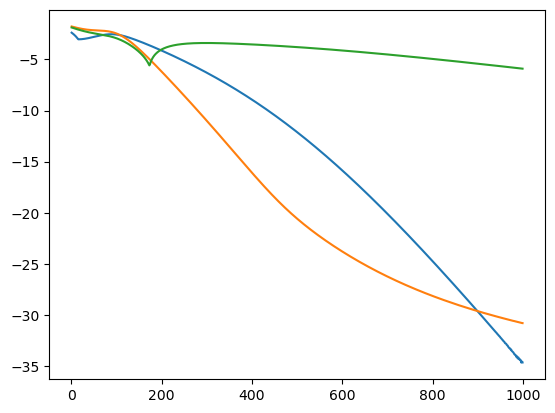

In [25]:
# print(Q_tilde_star)
# print(reward)
# print(pi)
# print(temp.gap[-1])
stop = 1000

x_range = np.linspace(0, N, num=N, endpoint=False)
plt.plot((x_range[1:stop]), np.log(NE_gaps[1:stop]))
# plt.plot(np.log(x_range[1:stop]), np.log(NE_gaps[1:stop]))
# plt.plot(np.log(x_range[1:stop]), np.log(np.sqrt(1/x_range[1:stop])))
# plt.plot(np.log(x_range[1:stop]), np.log((1/x_range[1:stop])))
# plt.plot(np.log(x_range[1:stop]), np.log((1/x_range[1:stop])**2))

# plt.xlim(0,5)

In [26]:
# N = 1000

temp = MARL_agent(rewards, s, a, rho, gamma, n, prob_transition, tau=0.1)
temp.tau = 1
temp.step = 0.01
# temp.theta = np.zeros(shape=n* s* a)
temp.theta = np.random.uniform(0,1, size=n* s* a)

prob_record = []
Pi_global_record = []

dif_pi_Q = []
dif_bound = []
alpha = 1-temp.step*temp.tau/(1-gamma)
print("alpha", alpha)
# xi_global = np.zeros((N, s, A))
N = 300
xi_i = np.zeros((N+1, n, s, a))

# xi_i[0] = 
for state in range(s):
    for agent in range(n):
        for action in range(a):
            xi_i[0,agent, state, action] = np.sum(np.exp(Q_tilde_star[agent*(s*a):(agent+1)*(s*a)]/temp.tau))/a #start at even pi distribution
for i in tqdm(range(N)):
#   temp.NPG_entropy_step(verbose=False)
    A_tildes, pi, Pi_global, V_tau, A_tau = temp.NPG_entropy_step_change(verbose=False)
    prob_record.append(pi)
    Pi_global_record.append(Pi_global)
    
    dif_pi_Q.append(Cal_diff_pi(pi_star,pi,Q_minus_log_pi_star))
    state = 0
    sum_temp = 0
    for agent in range(n):
        sum_temp+=a*np.abs(pi_star[agent*s*a + state*a:agent*s*a + state*a+a] - pi[agent*s*a + state*a:agent*s*a + state*a+a]).max()
    dif_bound.append((Q_minus_log_pi_star.max()-Q_minus_log_pi_star.min())*sum_temp)
#     for state in range(s):
#         for agent in range(n):
#             for action in range(a):
#                 xi_i[i+1,agent, state, action] = xi_i[i,agent, state, action]**alpha*np.exp((1-alpha)* temp.Q_tilde[i][agent*(s*a)+state*a+action] /temp.tau)
#         for global_action in range(A):
#             Q_global = (temp.Q_global[i][state*(a**n)+global_action])

# print(A_tildes)
print(pi.shape)
plt.plot(temp.gap)

NameError: name 'MARL_agent' is not defined

In [7]:
# print(dif_pi_Q)


plt.plot(dif_pi_Q)
plt.plot(dif_bound)
plt.ylim(0,0.01)



NameError: name 'dif_pi_Q' is not defined

In [27]:
def Cal_diff_pi(pi_1, pi_2, vector):
    state = 0
    dist1 = np.zeros((n,a))
    dist2 = np.zeros((n,a))
    Q = vector[state,:]
    for agent in range(n):
        for action in range(a):
            dist1[agent,action] = pi_1[agent*s*a + state*a+action]
            dist2[agent,action] = pi_2[agent*s*a + state*a+action]
        
    weighted_sum = 0
    for global_action in range(A):
        counter = global_action
        prob1 = 1
        prob2 = 1
        for agent in range(n):
            local_action = counter%a
            counter = int(counter/a)
            prob1 *= dist1[agent,local_action]
            prob2 *= dist2[agent,local_action]
        weighted_sum += (prob1-prob2)*Q[global_action]
    return weighted_sum



In [28]:
Q_minus_log_pi = np.zeros(N)
        
state = 0
global_action = 0

# for i in range(N):
#     Q_minus_log_pi[i] = temp.Q_global[i][(state*A)+global_action] - temp.tau*np.log(Pi_global_record[i][state,(state*A)+global_action])
    
    
Q_minus_log_pi_star = np.zeros((s, A))

for state in range(s):
    for global_action in range(A):
        Q_minus_log_pi_star[state, global_action] = Q_global_star[(state*A)+global_action] - temp.tau*np.log(Pi_global_star[state,(state*A)+global_action])

    

NameError: name 's' is not defined

In [10]:
# plt.plot(Q_minus_log_pi_star)

In [29]:
print(temp.Q_global[-1][0])
# for agent in range(n):
#     print("agent", agent)
#     print(temp.Q_tilde[-1][agent*s*a])
# # print(temp.Q_global[-1][0].shape)
print(np.log(xi_i[-2,:,0,0]))

xi_global = np.sum(np.log(xi_i[-2,:,0,0]))
log_pi = 0
for agent in range(n):
    log_pi+= np.log(pi[agent*s*a])
print(xi_global+2*log_pi)
# check monotonicity of tilde{Q}
# plt.plot(temp.Q_global)
# print(temp.Q_tilde[-1].shape)
# plt.plot(temp.Q_tilde-temp.tau*np.log(prob_record))
plt.plot(np.log(xi_i[:,0,0,0]))

NameError: name 'temp' is not defined

In [12]:
local_actions = np.random.randint(a,size=n)
print("local actions:", local_actions)
global_action = local_actions[0]+local_actions[1]*a+local_actions[2]*a*a
print("global action:", global_action)
state = np.random.randint(s)
print("state:", state)
sum_Q = []
Q_sa = []
for i in range(N):
    Q_tilde_temp = 0
    Q_global_temp = n*(temp.Q_global[i][state*(a**n)+global_action])
    for agent in range(n):
#         Q_tilde_temp += temp.Q_tilde[i][agent*(s*a)+state*a+local_actions[agent]]-temp.tau*np.log(prob_record[i][agent*(s*a)+state*a+local_actions[agent]])
#         Q_global_temp -= temp.tau*np.log(prob_record[i][agent*(s*a)+state*a+local_actions[agent]])
        Q_tilde_temp += temp.Q_tilde[i][agent*(s*a)+state*a+local_actions[agent]]
    sum_Q.append(Q_tilde_temp)
    Q_sa.append(Q_global_temp)
plt.plot(sum_Q)    
# plt.plot(Q_sa)    
# #check monotonicity of V_{tau}
# for i in range(0,len(temp.gap)-1):
#     temp.gap[i] -= temp.gap[i+1]
# plt.plot(temp.gap[0:90])
# print(np.max(temp.gap[0:90]))

NameError: name 'a' is not defined

In [13]:
# A_tildes, pi, V_tau, A_tau


In [14]:
global_Q = 0
Q_i = 0
index = N-1
state = 2
for action1 in range(a):
    for action2 in range(a):
        for action3 in range(a):
            global_action = action1+action2*a+action3*a*a
            term = temp.Q_global[index][state*(a**n)+global_action]
            global_prob = prob_record[index][state*a+action1]*prob_record[index][s*a+state*a+action2]*prob_record[index][2*s*a+state*a+action3]
            global_Q+= global_prob*(term - temp.tau*np.log(global_prob))
#             global_Q+= global_prob*(A_tau[state*(a**n)+global_action] )
for action in range(a):
    local_prob = prob_record[index][state*a+action]
    term = temp.Q_tilde[index][0*(s*a)+state*a+action]
    Q_i+= local_prob*(term - temp.tau*np.log(local_prob))
#     Q_i+= local_prob*(A_tildes[0][state*a+action])
    
print(global_Q)
print(Q_i)
# print(temp.Q_global[index])
# print(temp.Q_tilde[index])
# print(prob_record[index])



NameError: name 'a' is not defined

In [15]:
# approximate optimal value via soft q-iteration
temp_opt = MARL_agent(rewards, s, a, rho, gamma, n, prob_transition, tau=0.1)
temp.step = 0.1
temp.theta = np.zeros(shape=n* s* a)
ell_star, A_tildes_opt, pi_opt, V_tau_opt = temp_opt.solver(typ='global')
print(ell_star)

NameError: name 'MARL_agent' is not defined

In [16]:
# judge convergence rate via log plot
opt_gap = [ell_star - gap for gap in temp.gap]
plt.axes(yscale='log')
# plt.axes(xscale='log')
plt.plot(opt_gap)

NameError: name 'temp' is not defined

In [17]:
# check middle results
print('Atildes', A_tildes)
print('pi', pi)
print('Vtau', V_tau)
print('Atau', A_tau)
print('test', np.dot(A_tildes[0], pi[0:s*a]))

NameError: name 'A_tildes' is not defined

In [10]:
def cal_Q_tildes(Atildes, Pi, Vtau, tau=0.1):
    Q_tildes = np.zeros(n*s*a)
    for agent in range(n):
        for state in range(s):
            Q_tildes[agent*s*a+state*a:agent*s*a+(state+1)*a] = Atildes[agent][state*a:(state+1)*a] 
            + tau * np.log(Pi[state*a:(state+1)*a]) + Vtau[state]
    return Q_tildes
            
Q_tildes = cal_Q_tildes(A_tildes, pi, V_tau, 0.1)
Q_tildes_opt = cal_Q_tildes(A_tildes_opt, pi_opt, V_tau_opt, 0.1)
print(max(np.abs(Q_tildes - Q_tildes_opt)))

0.00760697948977569


In [11]:
def Q_cal(V, func):
    Q = np.zeros(s * A)
    for i in range(s):
        for j in range(A):
            Q[i * A + j] = func[i * A + j] + gamma * np.matmul(prob_transition[i * A + j], V)
    return Q

Q = Q_cal(V_tau, reward)
Q_opt = Q_cal(V_tau_opt, reward)
print(max(np.abs(Q - Q_opt)))

2.125484575365988e-05


In [5]:
prob = temp.theta_to_policy()
Pi = temp.get_Pi(prob)
mat = np.identity(temp.s * temp.A) - temp.gamma * np.matmul(temp.prob_transition, Pi)
P_theta = np.matmul(Pi, temp.prob_transition) # |S|*|S|
d_pi = (1 - temp.gamma) * np.dot(np.transpose((np.linalg.inv(np.identity(temp.s) - temp.gamma * P_theta))), temp.rho)

print(temp.theta)
print(prob)

[2.32789176 1.42730195 0.         0.17390555 0.35655456 0.38287269
 0.20226845 0.22354205]
[0.71107069 0.28892931 0.45663285 0.54336715 0.49342085 0.50657915
 0.4946818  0.5053182 ]


In [ ]:
N = 500
ax1 = plt.subplot(211)
# ax1.plot(t, np.sin(2*np.pi*t))

ax2 = plt.subplot(212, sharex=ax1)
# ax2.plot(t, np.sin(4*np.pi*t))

for j in range(5):
    temp = MO_MARL(rewards, s, a, rho, gamma, n, prob_transition)
    for i in tqdm(range(N)):
        temp.Centralized_NPG_step(verbose = False)
    ax1.plot(temp.gap)
    ax2.plot(temp.avg_gap)
    
plt.show()
    

 32%|███▏      | 158/500 [00:01<00:02, 140.39it/s]

In [14]:
agent_num = 5
Laplacian = np.zeros((agent_num, agent_num))

for i in range(agent_num):
    Laplacian[i,i] = -2
    Laplacian[i,(i+1)%agent_num] = 1
    Laplacian[i,(i-1)%agent_num] = 1
print(Laplacian)

W = np.zeros((agent_num, agent_num))
eta = 0.1
for i in range(agent_num):
    W[i,i] = 1-2*eta
    W[i,(i+1)%agent_num] = eta
    W[i,(i-1)%agent_num] = eta
print(W)



[[-2.  1.  0.  0.  1.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 1.  0.  0.  1. -2.]]
[[0.8 0.1 0.  0.  0.1]
 [0.1 0.8 0.1 0.  0. ]
 [0.  0.1 0.8 0.1 0. ]
 [0.  0.  0.1 0.8 0.1]
 [0.1 0.  0.  0.1 0.8]]


In [9]:
agent_list = []
for i in range(agent_num):
    agent_list.append(MO_MARL(rewards, s, a, rho, gamma, n, prob_transition))
# for k in range(5):
old_grad = np.zeros((agent_num, reward_num))
grad = np.zeros((agent_num, reward_num))
y = np.zeros((agent_num, reward_num))
all_theta = np.zeros((agent_num, n*s*a))
N = 1000
for k in tqdm(range(N)):
    
    for i in range(agent_num):
        grad[i] = agent_list[i].calculate_G(num=i,verbose = False)
        all_theta[i] = copy.deepcopy(agent_list[i].theta)

    y = W@y+grad-old_grad
#     y = W@grad
#     y = copy.deepcopy(grad)
#     y = y + eta*Laplacian@grad
    old_grad = copy.deepcopy(grad)
    all_theta = W@all_theta
        
    for i in range(agent_num):
        agent_list[i].theta=all_theta[i]
        agent_list[i].NPG_step_given_G(y[i], verbose = False)
        

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:07<00:00,  2.72it/s]


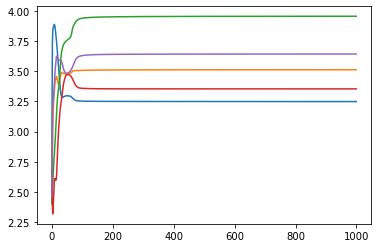

In [10]:
# plt.plot(agent_list[0].Q_record)
plt.plot(agent_list[0].V_record[0])
plt.plot(agent_list[0].V_record[1])
plt.plot(agent_list[0].V_record[2])
plt.plot(agent_list[0].V_record[3])
plt.plot(agent_list[0].V_record[4])

6.313887881586048
6.266685230417442
6.30454248226258
6.367220519322908
6.312252667057926


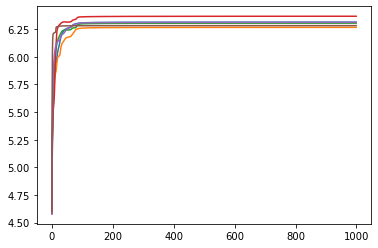

In [13]:
# plt.plot(agent_list[0].gap)

for i in range(agent_num):
    plt.plot(agent_list[i].gap)
    print(agent_list[i].gap[-1])
plt.plot(temp.gap)